obs if you are running this in vscode, you need to select python environment as prolif, and then select the prolif environment as your kernel too 

In [1]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import prolif as plf
import MDAnalysis as mda
import pandas as pd
import src.analysis_functions as analysis_functions
import seaborn as sns
from typing import Optional
import src.simulation_metadata as sims

# Load unis using analysis scripts

In [10]:
crystal_or_em = 'crystal_binding_fp'

if crystal_or_em == 'crystal_binding_fp':
    sim_list = [sims.PfHT_MMV_crystal, 
                sims.PfHT_MMV8_crystal, 
                sims.W412A_MMV_crystal,
               # sims.GLUT3_MMV_crystal
                ]
elif crystal_or_em == 'em_binding_fp':
    sim_list = [sims.PfHT_MMV12, 
                sims.PfHT_MMV8, 
                sims.W412A_MMV12,
                #sims.GLUT1_MMV12
                ]

#sim_list = [sims.PfHT_3361_em, sims.PfHT_3361_crystal]

color_l = [sim.color for sim in sim_list]

all_unis, all_lens = analysis_functions.load_unis(
    sim_list= sim_list
)


# Run fp , save df, put in dict

If you don't change anything here you could turn this calculation to false to save time. Right now I have skip50 on to make the calculation smoother

In [11]:
all_fp_dfs = {}
skip = 1

for sim in sim_list:
    temp_fp_dfs = []
    for n, rep_fp in enumerate(all_unis[sim.name]):
        df = analysis_functions.get_fp_dataframe(
            u=rep_fp,
            skip=skip,
            run_calc=False,
            filename=f"{sim.name}.replica_{n+1}.skip{skip}",
        )
        temp_fp_dfs.append(df)
    all_fp_dfs[sim.name] = temp_fp_dfs


# Plotting all interaction types, all replicas on one bar

The function `analysis_functions.mean_intxn_time_dfs_wide` will take a fingerprint dataframe and combine based on an interaction time, reporting back the % intxn time

---
The output of this is in a wide dataframe, so then we use `analysis_functions.process_wide_df` to melt the array, and rename oolumns meaningfully

---
Lastly, plot the dataframe in an sns plot

Choose interaction name here with `intxn_name`
Most common for PfHT and MMV are:
1. `HBAcceptor`
2. `HBDonor`
3. `Hydrophobic`
4. `PiStacking`

In [16]:
intxn_name = "PiStacking"
n_intxns = analysis_functions.pct_intxn_per_residue_wide(
    intxn_name=intxn_name,
    all_fp_dfs=all_fp_dfs,
    sims=sim_list,
)

n_intxns = analysis_functions.process_wide_df(
    df=n_intxns,
    index_col_name="residue",
    condition_to_remove=None ,#sims.GLUT1_MMV12.name,
    index_name="protein",
    top_level_melt_name="protein",  # put condition names together in col called protein
    lower_level_melt_name="replica",  # put replica columns together into one column called replica
    add_21=True,
)


plot with sns. Use barplot and stripplot to show the mean of the 3 reps, and then the raw rep data on top

(0.0, 1.1)

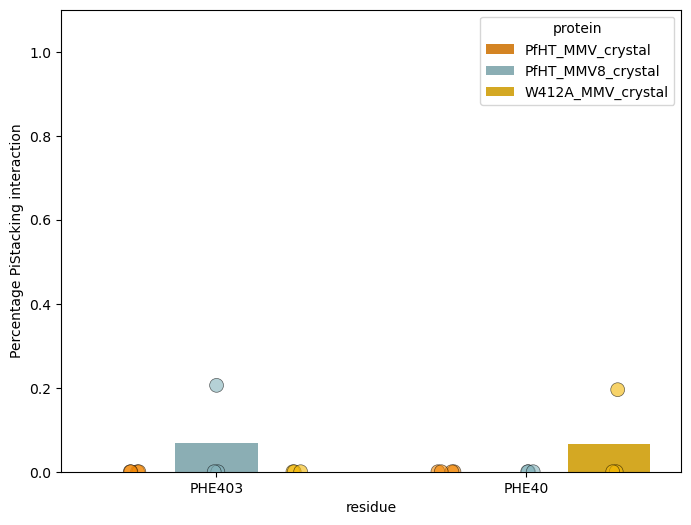

In [17]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(
    data=n_intxns,
    x="residue",
    y="value",
    hue="protein",
    errorbar=None,
    ax=ax,
    palette=color_l,
)

sns.stripplot(
    data=n_intxns,
    x="residue",
    y="value",
    hue="protein",
    ax=ax,
    dodge=True,
    alpha=0.6,
    edgecolor="black",
    linewidth=0.5,
    legend=False,
    size=10,
    palette=color_l,
)

ax.set_ylabel(f"Percentage {intxn_name} interaction")
ax.set_ylim(0, 1.1)


---

---

---

---

---

---

---

From here down it's mostly sandbox still, not incorporated with `analysis_functions`